<a href="https://colab.research.google.com/github/tylerana/tylerana.github.io/blob/main/Cuetessa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Valence in music, describes how positive a song is. 
<br>
**Terminology:**
1. **Frequency(Hz):** describes the differences of wave lengths (high/low pitches)
2. **Intensity(db/power):** The amplitude (height) of the wave. 
3. **Sample Rate:** Specific to how the computer reads in the audio file. It is the "resolution" of the audio.

In [1]:
#!pip install pydub

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [3]:
import pandas as pd
import datetime
import numpy as np
import os
from glob import glob
import librosa
import librosa.display
import IPython.display as ipd
import soundfile as sf
from matplotlib import pyplot as plt

In [4]:
import warnings
warnings.filterwarnings("ignore")

# Audio Analysis of a single file

In [5]:
# %cd "/content/drive/MyDrive/DEAM_audio/MEMD_audio"
pathAudio = "/content/drive/MyDrive/DEAM_audio/MEMD_audio"
files = librosa.util.find_files(pathAudio, ext=['mp3'])
files = np.asarray(files)
ipd.Audio(files[0])

In [6]:
y, sample_rate = librosa.load(files[0])
# y is the raw data of the audio file
print('y:',y)
# sr is the integer value of the sample rate.
print('sample rate:', sample_rate)

y: [ 0.          0.          0.         ... -0.02295786 -0.0393608
 -0.05048249]
sample rate: 22050


Plot visualizing the first five seconds of a song.

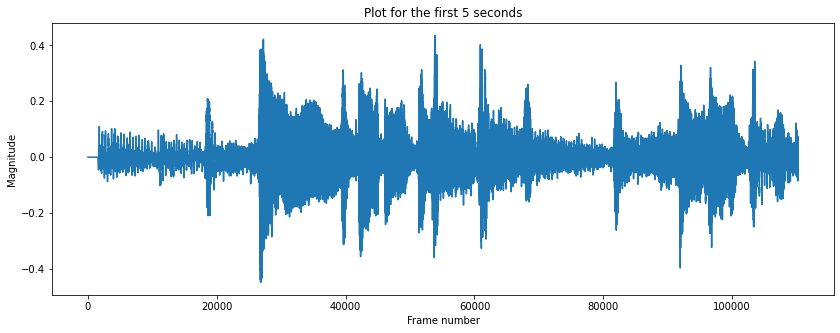

In [7]:
plt.figure(figsize=(14, 5))
plt.plot(y[:sample_rate * 5])
plt.title('Plot for the first 5 seconds')
plt.xlabel('Frame number')
plt.ylabel('Magnitude')
plt.show()

Spectrogram <br>
We now look at the spectrogram for the song. Spectrograms give us a way to visualize the signal strength or "loudness". 

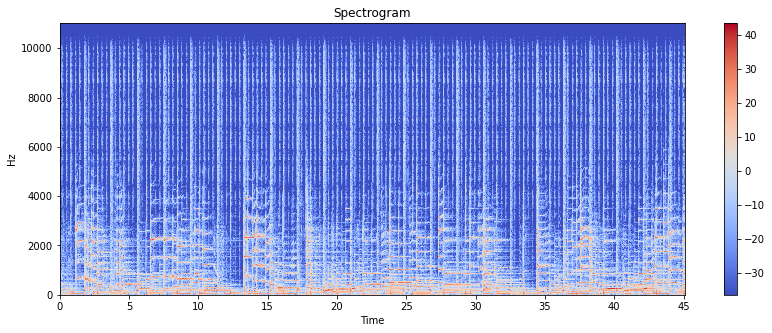

In [8]:
X = librosa.stft(y)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
plt.title('Spectrogram')
librosa.display.specshow(Xdb, sr=sample_rate, x_axis='time', y_axis='hz')
plt.colorbar()

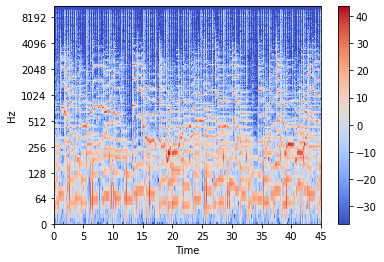

In [9]:
librosa.display.specshow(Xdb, sr=sample_rate, x_axis='time', y_axis='log')
plt.colorbar()

# Audio Analysis of Multiple Files

Converting files from .mp3 to .wav to try to lessen the load time.

In [10]:
# from pydub import AudioSegment

# path = "/content/drive/MyDrive/DEAM_audio/MEMD_audio"

# #Change working directory
# os.chdir(path)

# audio_files = os.listdir()

# # You dont need the number of files in the folder, just iterate over them directly using:
# for file in audio_files:
#     #spliting the file into the name and the extension
#     name, ext = os.path.splitext(file)
#     if ext == ".mp3":
#        mp3_sound = AudioSegment.from_mp3(file)
#        #rename them using the old name + ".wav"
#        mp3_sound.export("{0}.wav".format(name), format="wav")

# took 15m 54s to run

Removing MP3 files

In [11]:
# import shutil
# images = [f for f in os.listdir() if '.mp3' in f.lower()]
# os.mkdir('mp3Files')

# for image in images:
#     new_path = 'mp3Files/' + image
#     shutil.move(image, new_path)

In [15]:
# function to extract audio features
def featureExtraction(path):
  audio, sr = librosa.load(path)
  return audio, sr

  

1000.wav  1206.wav  1411.wav  1619.wav	1824.wav  202.wav   423.wav  711.wav
1001.wav  1207.wav  1412.wav  161.wav	1825.wav  2030.wav  425.wav  712.wav
1002.wav  1208.wav  1413.wav  1620.wav	1826.wav  2031.wav  426.wav  713.wav
1003.wav  1209.wav  1414.wav  1621.wav	1827.wav  2032.wav  427.wav  714.wav
1004.wav  120.wav   1415.wav  1622.wav	1828.wav  2033.wav  428.wav  715.wav
1005.wav  1210.wav  1416.wav  1623.wav	1829.wav  2034.wav  429.wav  717.wav
1006.wav  1211.wav  1417.wav  1624.wav	182.wav   2035.wav  42.wav   718.wav
1007.wav  1212.wav  1418.wav  1625.wav	1830.wav  2036.wav  430.wav  719.wav
1008.wav  1213.wav  1419.wav  1626.wav	1831.wav  2037.wav  431.wav  71.wav
1009.wav  1214.wav  1420.wav  1627.wav	1832.wav  2038.wav  432.wav  721.wav
1010.wav  1215.wav  1421.wav  1628.wav	1833.wav  2039.wav  435.wav  722.wav
1011.wav  1216.wav  1422.wav  1629.wav	1834.wav  203.wav   436.wav  723.wav
1012.wav  1217.wav  1423.wav  162.wav	1835.wav  2040.wav  437.wav  724.wav
1013.wav  1218.